In [211]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [212]:
crop = pd.read_csv("Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [213]:
print(crop.isnull().sum())
print(crop.duplicated().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64
0


In [214]:
crop_dict = {label: idx for idx, label in enumerate(crop['label'].unique())}
crop['label_num'] = crop['label'].map(crop_dict)

In [215]:
X = crop.drop(['label', 'label_num'], axis=1)
y = crop['label_num']

In [216]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [218]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [219]:
model_performance = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    model_performance.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Create DataFrame for performance comparison
performance_df = pd.DataFrame(model_performance)
performance_df = performance_df.sort_values(by='Accuracy', ascending=False)
performance_df.reset_index(drop=True, inplace=True)
performance_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.995455,0.995818,0.995455,0.995423
1,Random Forest,0.993182,0.993735,0.993182,0.993175
2,Decision Tree,0.981818,0.982331,0.981818,0.981809
3,Gradient Boosting,0.981818,0.984271,0.981818,0.981851
4,Support Vector Machine,0.968182,0.971517,0.968182,0.968027
5,K-Nearest Neighbors,0.965909,0.970545,0.965909,0.965941
6,Logistic Regression,0.963636,0.964442,0.963636,0.963512


In [220]:
best_model_name = performance_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

Best Model: Naive Bayes


In [221]:
y_pred_best = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_best)

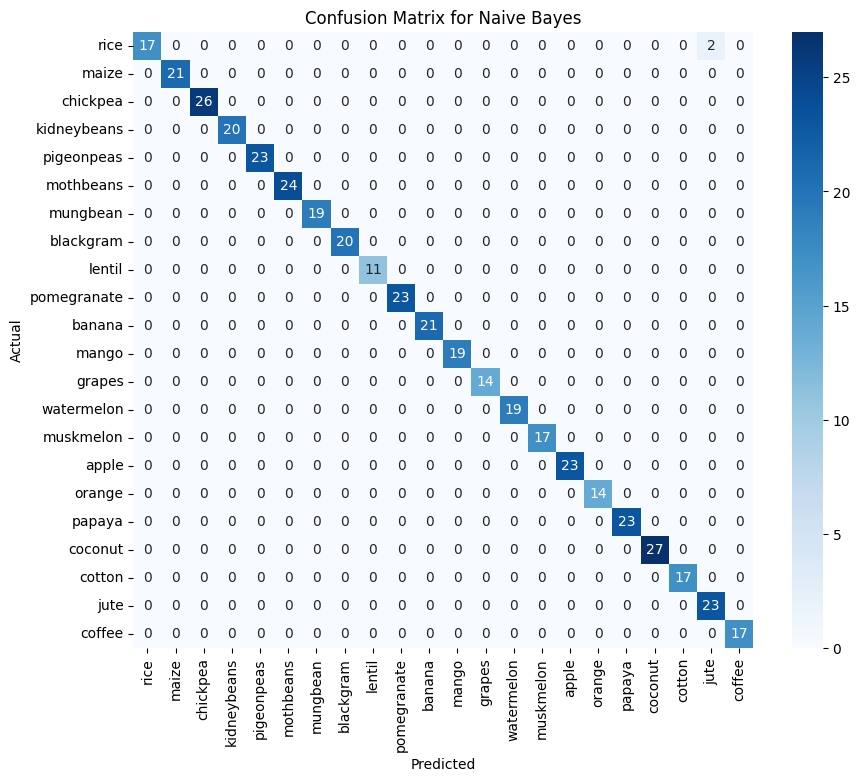

In [222]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=crop_dict.keys(), yticklabels=crop_dict.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()

In [223]:
def recommend_crop(N, P, K, temperature, humidity, ph, rainfall):
    input_features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    input_scaled = scaler.transform(input_features)
    prediction = best_model.predict(input_scaled)
    crop_name = list(crop_dict.keys())[list(crop_dict.values()).index(prediction[0])]
    return crop_name

In [224]:
recommended_crop = recommend_crop(108,89,53,29.12036889,80.18080728,5.908770059,112.3982055)
print(f"Recommended Crop: {recommended_crop}")

Recommended Crop: banana


C:\Users\revan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [225]:
import pickle
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [226]:
from sklearn.metrics import mean_squared_error
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

In [227]:
df=pd.read_csv('yield.csv')

In [228]:
df.columns = df.columns.str.strip()
df.replace("", pd.NA, inplace=True)
df.dropna(subset=['Area', 'Production'], inplace=True)
df = df[df['Production'] > 0]
df = df[df['Area'] > 0]

In [229]:

le_district = LabelEncoder()
le_crop = LabelEncoder()
df['District_Code'] = le_district.fit_transform(df['District_Name'])
df['Crop_Code'] = le_crop.fit_transform(df['Crop'])
X = df[['District_Code', 'Crop_Code']]
df['pp']=df['Production']/df['Area']
y = df['pp']
df = pd.read_csv("yield.csv")
df.dropna(subset=['Area', 'Production'], inplace=True)

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")

Mean Squared Error: 918364.46


In [231]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler1.fit(X_train)
# Save it
with open('scaler1.pkl', 'wb') as f:
    pickle.dump(scaler1, f)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

with open("yieldmodel.pkl", "wb") as f:
    pickle.dump(model, f)  # ✅ This is correct


In [232]:
def predict_yield(state, district, year, season, crop, area_input):
    model = joblib.load("yieldmodel.pkl")
    le_state, le_district, le_season, le_crop = joblib.load("label_encoders.pkl")

    try:
        district_code = le_district.transform([district])[0]
        crop_code = le_crop.transform([crop])[0]
    except ValueError as e:
        return f"Error: {e}"

    input_features = [[district_code,crop_code]]
    predicted_production = model.predict(input_features)[0]

    # Calculate yield = production / area
    predicted_yield = predicted_production / area_input if area_input > 0 else 0
    return {
        "Predicted Production (tonnes)": round(predicted_production, 2),
        "Predicted Yield (tonnes/ha)": round(predicted_yield, 2)
    }

In [236]:
import pickle
with open('yieldmodel.pkl', 'wb') as mf:
    pickle.dump(model, mf)

with open('scaler1.pkl', 'wb') as scaler_file:
    pickle.dump(scaler1, scaler_file)
with open('label.pkl','wb') as l:
    pickle.dump(le_crop,l)
with open('dist.pkl','wb') as dist:
    pickle.dump(le_district,dist)

In [234]:
print(f"Type of yieldmodel: {type(model)}")


Type of yieldmodel: <class 'sklearn.ensemble._forest.RandomForestRegressor'>


In [235]:
print("Type of yieldmodel:", type(model))

Type of yieldmodel: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
